In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('./Data/iris.csv')
df = df.dropna()
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['variety']))}
df['variety'] = df['variety'].map(class_mapping)


In [15]:
train_df = df.sample(frac=0.8, random_state=255)
test_df = df.drop(train_df.index)

In [16]:
train_labels = train_df.pop('variety')
test_labels = test_df.pop('variety')

In [17]:
#Calculate the mean and standard deviation
means = train_df.groupby(train_labels).apply(np.mean)
stds = train_df.groupby(train_labels).apply(np.std)

c:\Users\Acer\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Acer\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Acer\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [18]:
#Function to calculate P(x | y)
def p_x_given_y(x, mean_y, std_y):
    p = 1 / (np.sqrt(2 * np.pi) * std_y) * np.exp(-0.5 * ((x - mean_y) / std_y)**2)
    return p

In [19]:
#Apply theorem to calculate P(y | X)
probs = pd.DataFrame()
for c in np.unique(train_labels):
    prior = np.sum(train_labels == c) / len(train_labels)
    probs[c] = prior * np.prod(p_x_given_y(test_df, means.loc[c], stds.loc[c]), axis=1)

In [20]:
pred_labels = probs.idxmax(axis=1)

In [21]:
#Calculate the accuracy

accuracy = np.sum(pred_labels == test_labels) / len(test_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


Draw plot

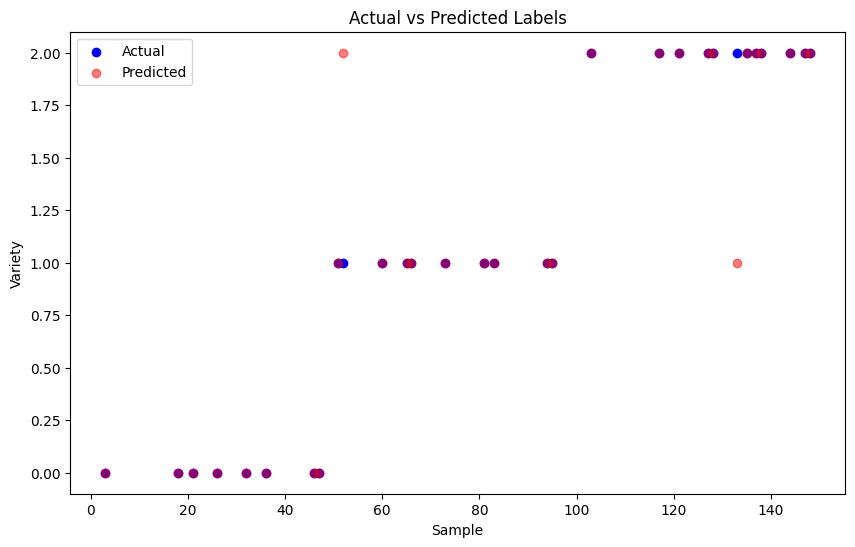

In [24]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': test_labels,
    'Predicted': pred_labels
})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_df.index, plot_df['Actual'], color='blue', label='Actual')
plt.scatter(plot_df.index, plot_df['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample')
plt.ylabel('Variety')
plt.legend()
plt.show()